In [1]:
#libraries needed
library(polynom)
#This function allows to choose the dimensions of plots in the notebook
fig <- function(width, heigth){
    options(repr.plot.width = width, repr.plot.height = heigth)
}
set.seed(1234)

## Exercise 1

In [2]:
x <- c(15.58, 15.9, 16, 16.1, 16.2)
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)

Applyng the definitions of $E[x]$ and $Var[x]$ for estimate them from the samples

In [3]:
E1 <- sum(x*p1)
E2 <- sum(x*p2)
Var1 <- sum((x-E1)^2 * p1)
Var2 <- sum((x-E2)^2 * p2)
cat('E_1 =', E1, '\tVar_1 =', Var1)
cat('\nE_2 =', E2, '\tVar_2 =', Var2)

E_1 = 15.959 	Var_1 = 0.033979
E_2 = 15.9622 	Var_2 = 0.02816716

## Exercise 2

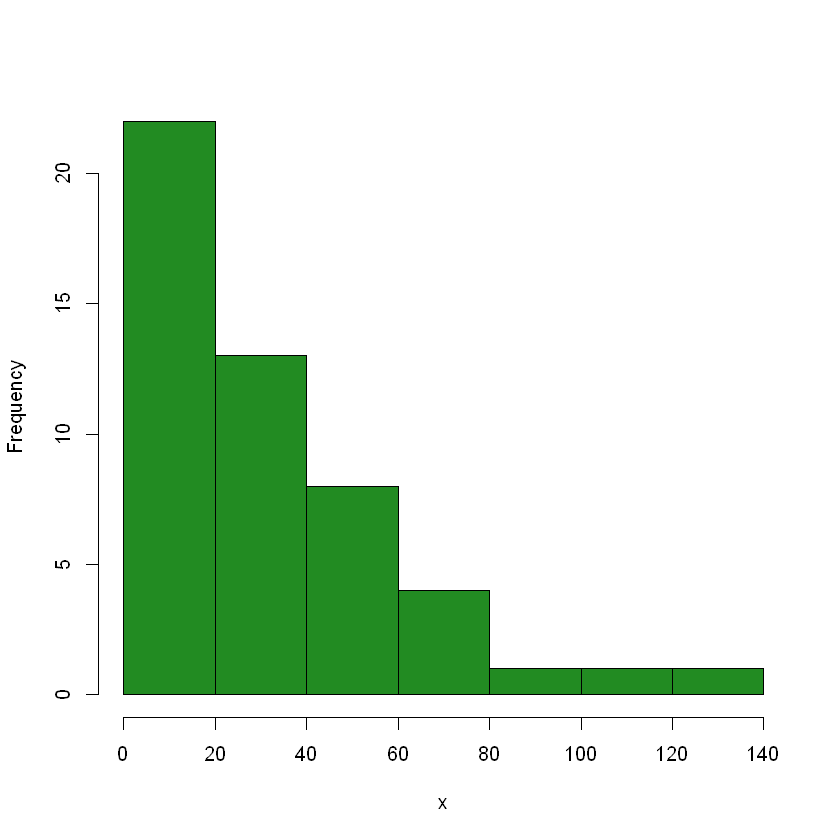

In [4]:
lambda <- 1/30
x <- rexp(50, lambda)
hist(x, col = 'forestgreen', main = '')

For the calculation of the probability we use the cdf

In [5]:
p <- pexp(10, lambda)
cat('The probability that a person will wait for less than 10 minutes is:')
sprintf('%.2f', p)

The probability that a person will wait for less than 10 minutes is:

[1] "0.28"

In [6]:
x_bar <- mean(x)
x_bar

[1] 29.67523

The average expected from theory is the reciprocal of the rate , so $E[x] = 30$. It can be seen that the empirical mean is close to the expected value

In [7]:
p <- 1 - pexp(60, lambda)
cat('The probability that a person will wait for more than an hour is:')
sprintf('%.2f', p)

The probability that a person will wait for more than an hour is:

[1] "0.14"

## Exercise 3

Poisson distribution

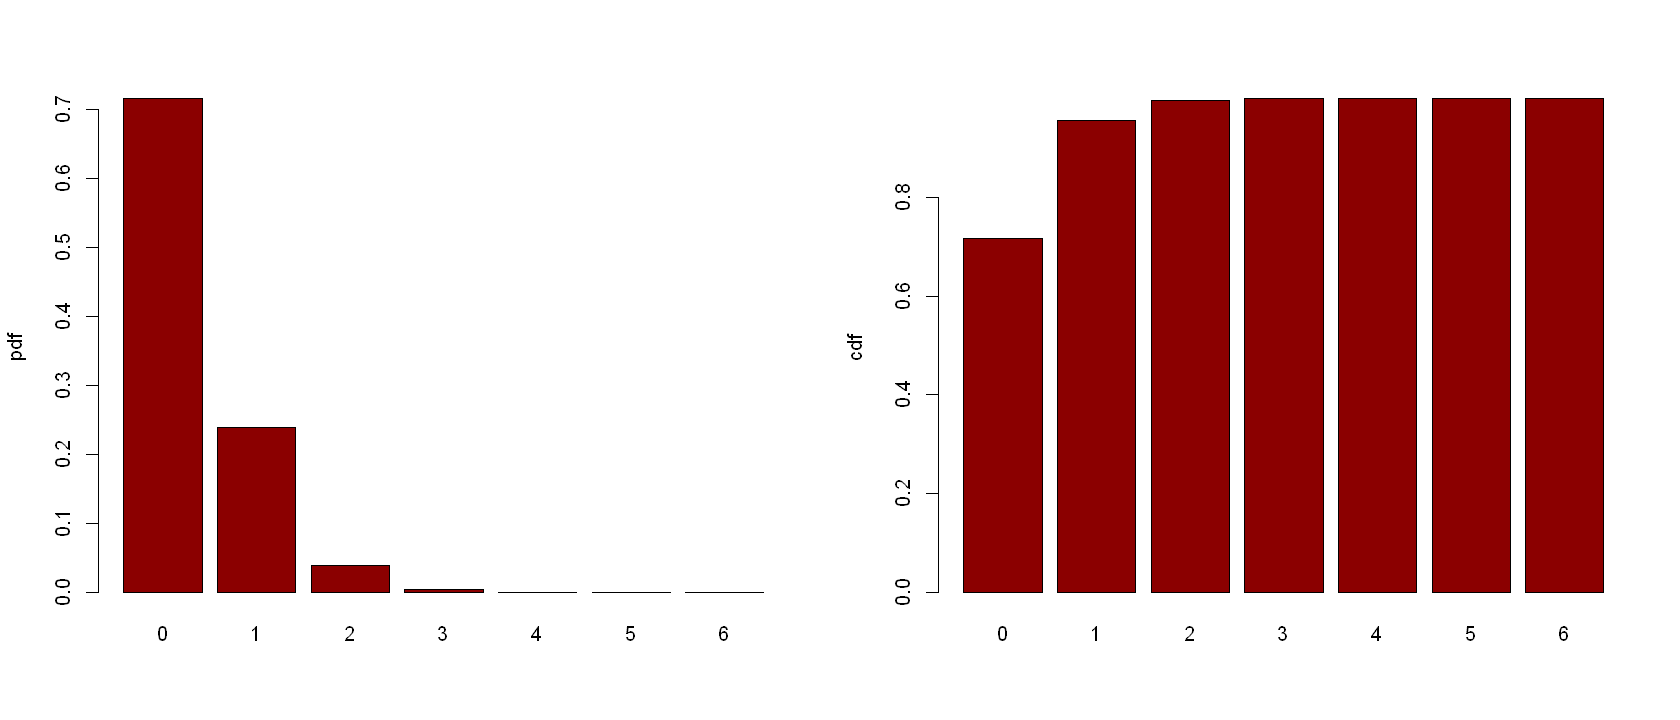

In [8]:
mu = 1/3
par(mfrow = c(1,2))
fig(14, 6)
t <- 0:6
x <- dpois(t, mu)
barplot(x, names = t, col = 'darkred', ylab = 'pdf')
X <- ppois(t, mu)
barplot(X, names = t, col = 'darkred', ylab = 'cdf')

In [9]:
p <- 1 - dpois(0, mu)
cat('The probability hat there is at least one error on a specific page is:')
sprintf('%.2f', p)

The probability hat there is at least one error on a specific page is:

[1] "0.28"

## Exercise 4

Geometric distribution

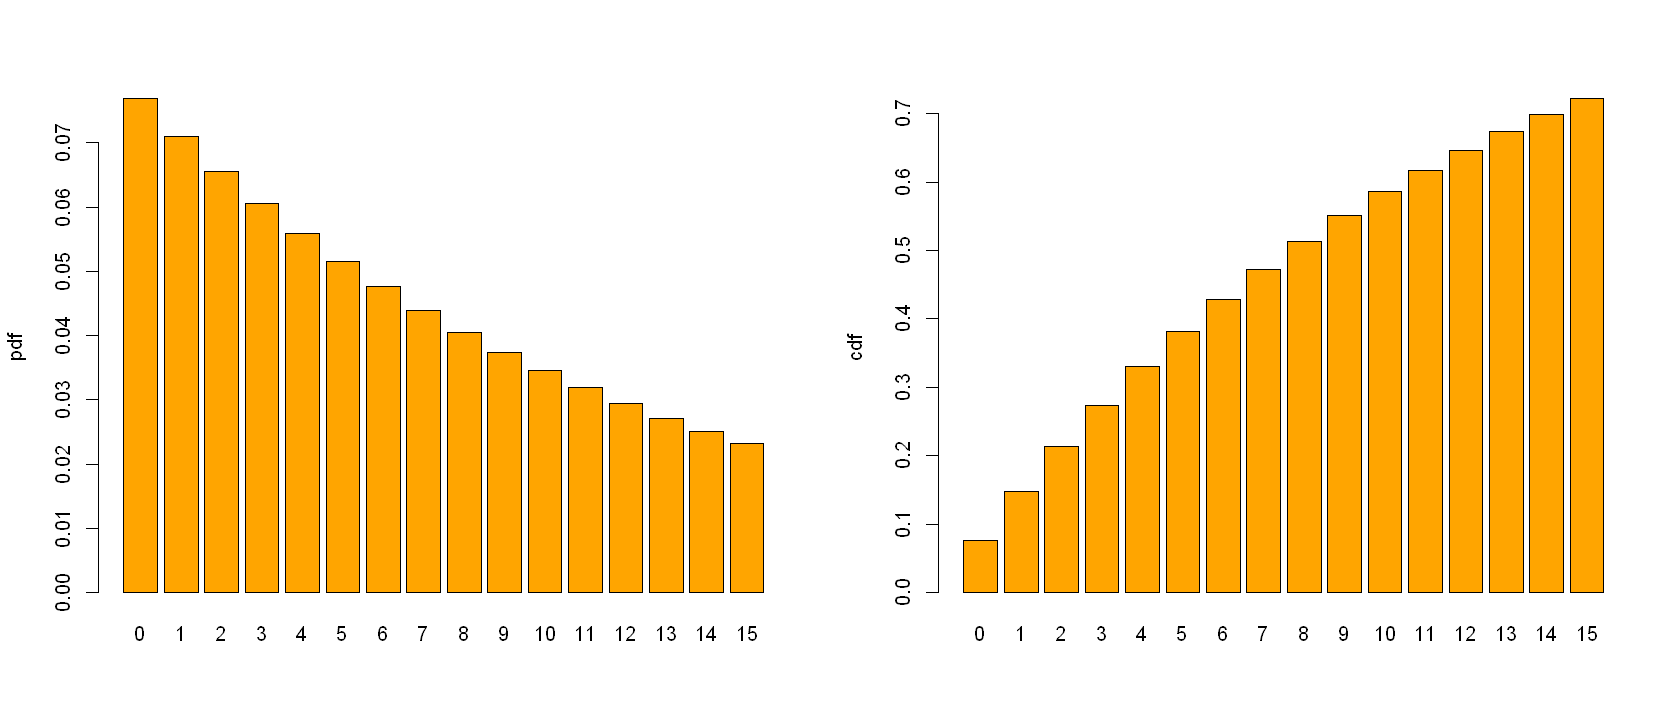

In [10]:
pr = 4/52 #Number of aces over number of cards
par(mfrow = c(1,2))
fig(14, 6)
t <- 0:15
x <- dgeom(t, pr)
barplot(x, names = t, col = 'orange', ylab = 'pdf')
X <- pgeom(t, pr)
barplot(X, names = t, col = 'orange', ylab = 'cdf')

This geometric distribution measures the probability of have $n$ failures before the first success. To compute the probability of drawing at least 10 cards we have to sum up the probabilities of having 9, 10, 11, 12 up to infinity failures

In [11]:
p <- 1-pgeom(8, 4/52)
cat('the probability that at least 10 draws are needed is:')
sprintf('%.2f', p)

the probability that at least 10 draws are needed is:

[1] "0.49"

## Exercise 5

In [12]:
mydistr <- function(x, c = 1){
    if (x <= 1 || x >= 2){0}
    else {c*(x-1)*(2-x)} 
}

In [13]:
normalization <- integrate(mydistr, lower = 1, upper = 2)
normalization

0.1666667 with absolute error < 1.9e-15

The normalization costant has to be such that the integral of mydistr is equal to 1

In [14]:
N <- 1/normalization$value
N

[1] 6

In the next cell the four functions for the custom pdf are defined. Notice that the analytical formula for the inverse cdf is difficult to be computed and also using software as Mathematica to perform the symbolical steps, the solution involves complex numbers (as the particular solution for q such that ($1 \leq q \leq 2$) does not always exist real). To avoid this issue, one can use the numerical solution of the polynomial.

In [15]:
dcustom <- function(x, c = N){
    if (x <= 1 || x >= 2){0}
    else {c*(x-1)*(2-x)} 
}

pcustom <- function(q, c = N){
    if (q <= 1){0}
    else if (q >= 2){1}
    else {c*(3/2*q^2-q^3/3-2*q+5/6)}
}

qcustom <- function(p, c = N){
    poly <- polynomial(c(5-6*p/N, -12, 9, -2))
    qs <- solve(poly)
    Re(qs[2])
}

rcustom <- function(n){
    u <- runif(n)
    sapply(u, qcustom)
}

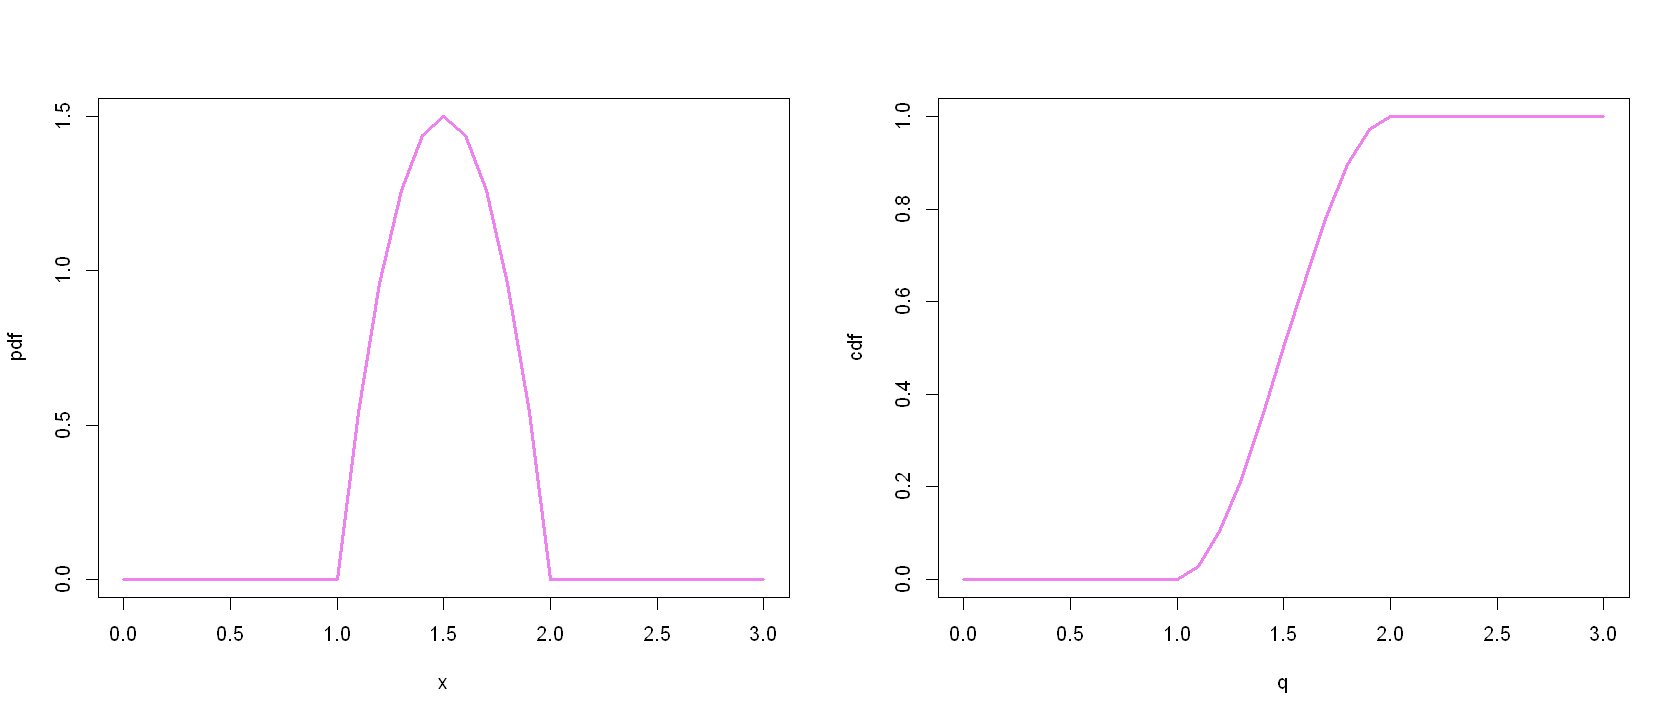

In [16]:
par(mfrow = c(1,2))
fig(14, 6)
x <- seq(0, 3, 0.1)
y <- sapply(x, dcustom)
plot(x, y, type = 'l', col = 'violet', lwd = 3, ylab = 'pdf')
y <- sapply(x, pcustom)
plot(x, y, type = 'l', col = 'violet', lwd = 3, xlab = 'q', ylab = 'cdf')

In [17]:
p <- 1 - pcustom(1.25)
cat('the probability  that the student will finish the aptitude test in more than 75 minutes is:')
sprintf('%.2f', p)

the probability  that the student will finish the aptitude test in more than 75 minutes is:

[1] "0.84"

In [18]:
p <- 1-pcustom(1.5) #Notice than 120 minutes is the maximum possible time
cat('the probability  that the student will take between 90 and 120 minutes is:')
sprintf('%.2f', p)

the probability  that the student will take between 90 and 120 minutes is:

[1] "0.50"

## Exercise 6

The lifetime of tires follows a distribution which is a constant ($10^4$) multiplied for the following distribution. To retrieve the values in km from the next plots it is sufficient to multiply the $x$ value times $10^4$.

In [19]:
dcustom <- function(x){
    if (x <= 1 || x >= 2){0}
    else {2/x^2} 
}

pcustom <- function(q){
    if (q <= 1){0}
    else if (q >= 2){1}
    else {2-2/q}
}

qcustom <- function(p){
    2/(2-p)
}

rcustom <- function(n){
    u <- runif(n)
    2/(2-u)
}

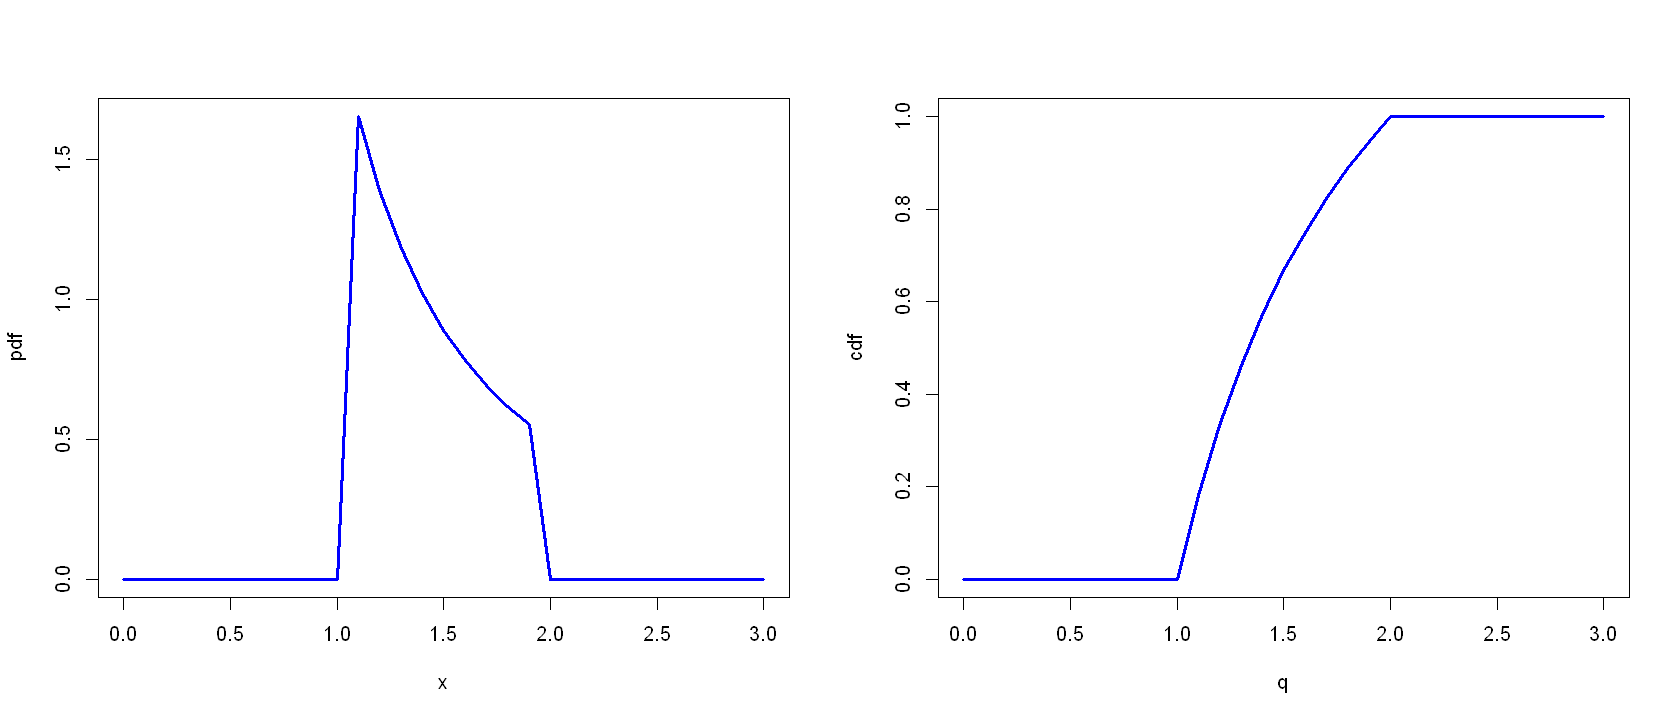

In [20]:
par(mfrow = c(1,2))
fig(14, 6)
x <- seq(0, 3, 0.1)
y <- sapply(x, dcustom)
plot(x, y, type = 'l', col = 'blue', lwd = 3, ylab = 'pdf')
y <- sapply(x, pcustom)
plot(x, y, type = 'l', col = 'blue', lwd = 3, xlab = 'q', ylab = 'cdf')

In [21]:
p <- pcustom(1.5) #15000/10^4
cat('the probability that tires will last less than 15000 km is:')
sprintf('%.2f', p)

the probability that tires will last less than 15000 km is:

[1] "0.67"

In [22]:
x <- rcustom(3000)
x_bar = mean(x)
x2 <- x^2
x2_bar = mean(x2)
var <- x2_bar-x_bar^2
cat('x_bar =', x_bar, '\tvar =', var)

x_bar = 1.388896 	var = 0.07782762

Notice that the expected values of the $E[x]$ and the $Var(x)$ are:
* $E[x] = \int_{\rm I\!R}\frac{2}{x}dx = 2\log(2) \simeq 1.386$ 
* $Var(x) = E[x^2] - E[x]^2 = 2\int_{\rm I\!R}dx - (2\log(2))^2 = 2 - 4(\log(2))^2 \simeq 0.078$